<a href="https://colab.research.google.com/github/nafisa003/Data-Science-and-ML/blob/main/class-04/Class_04_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('weight.csv')
data.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [3]:
data.shape

(7, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  7 non-null      int64
 1   Price   7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [6]:
data.isnull().sum()

Weight    0
Price     0
dtype: int64

Text(0.5, 1.0, 'Weight - Price Analysis')

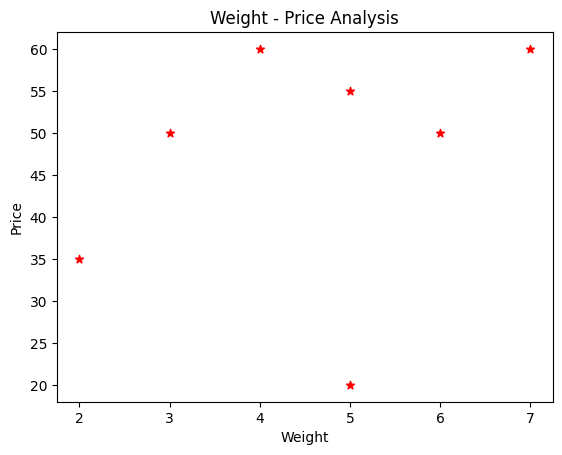

In [8]:
plt.scatter(data['Weight'], data['Price'], marker='*', color='red')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight - Price Analysis')

In [10]:
basic_stats= data.describe()
basic_stats

,Weight,Price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


In [12]:
correlation= data.corr()
correlation

,Weight,Price
Weight,1.000000,0.306795
Price,0.306795,1.000000


<Axes: >

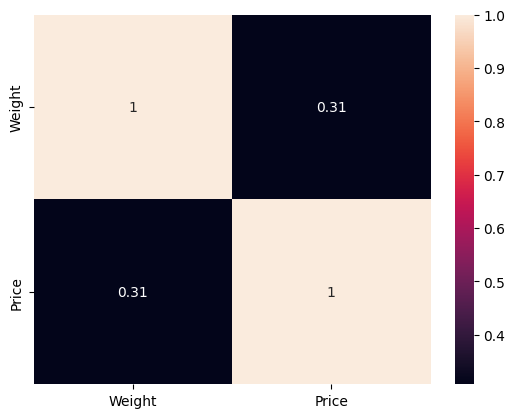

In [19]:
df=data
sns.heatmap(correlation,annot=True)

In [20]:
###Linear Regression
x=df['Weight']
y=df['Price']
mean_x=np.mean(x)
mean_y=np.mean(y)

In [27]:
dev_x = x- mean_x
dev_y= y- mean_y

In [28]:
slope =np.sum(dev_x * dev_y)/(np.sum( dev_x **2))
slope

2.620967741935484

In [29]:
intercept= mean_y - (slope * mean_x)
intercept

35.16129032258065

In [30]:
pred_y = (slope * 6) + intercept
pred_y

50.88709677419355

In [31]:
### Linear Regression with sklearn
from sklearn.linear_model import LinearRegression


In [32]:
reg= LinearRegression()

In [37]:
reg.fit(df[['Weight']],y) ##always 2D input

LinearRegression()

In [38]:
reg.coef_

array([2.62096774])

In [39]:
reg.intercept_

35.16129032258065

In [40]:
df['predicted_price']= reg.predict(df[['Weight']])

In [41]:
df.head()

,Weight,Price,predicted_price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


In [43]:
df['residuals']= df['Price'] - df['predicted_price']
df.head()

,Weight,Price,predicted_price,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


In [44]:
##mae
from sklearn.metrics import mean_absolute_error as mae
mae_error= mae(df['Price'], df['predicted_price'])
mae_error

9.87327188940092

In [46]:
###mse
from sklearn.metrics import mean_squared_error as mse
mse_error= mse(df['Price'], df['predicted_price'])
mse_error

167.30990783410135

Text(0.5, 1.0, 'Weight price Analysis')

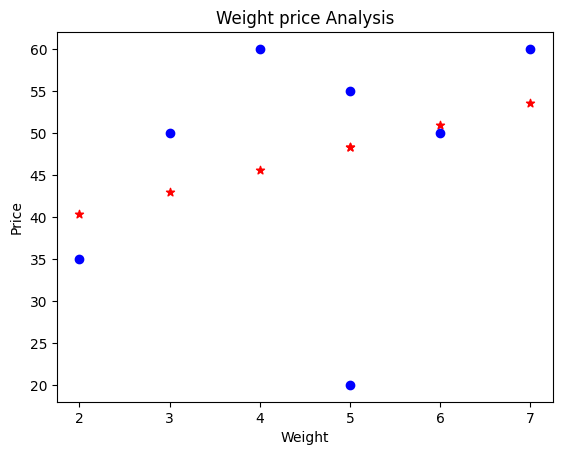

In [47]:
plt.scatter(x, df['predicted_price'], marker='*', color='red')

plt.scatter(df['Weight'], df['Price'], color='blue')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight price Analysis')